In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [11]:
print boston.DESCR


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now we visualize the current data
=====

plotting a histogram
====


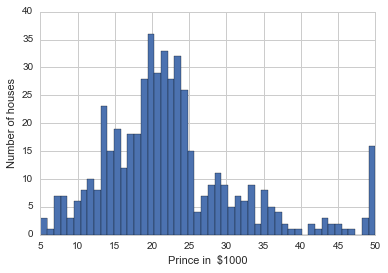

In [13]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prince in  $1000')
plt.ylabel('Number of houses')

In [22]:
len(boston.target.view())


506

In [24]:
np.mean(boston.target.view())

22.532806324110677

In [27]:
boston.target.view()[0]

24.0

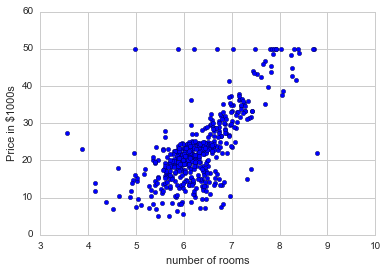

In [32]:
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('number of rooms')
plt.ylabel('Price in $1000s')

Great! Now we can make out a slight trend that price increases along with the number of rooms in that house. We can use scikit learn to see if we can fit the data linearly
* Use pandas to transform the boston dataset into a DataFrame
* then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [33]:
boston_df = DataFrame(boston.data)

In [35]:
# Now we label de columns for ease of calling the data
boston_df.columns = boston.feature_names

In [36]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [37]:
# Now we add the target column (price) to the DataFrame

boston_df['Price'] = boston.target

In [38]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


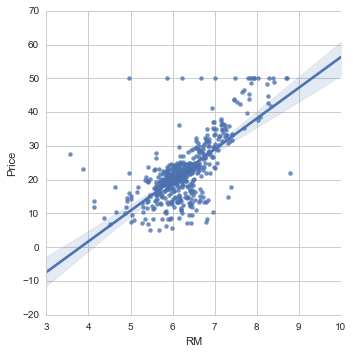

In [39]:
sns.lmplot('RM','Price',data=boston_df)

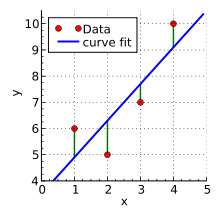

In [40]:
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

In [48]:
X = boston_df.RM

In [49]:
X.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [50]:
X = np.vstack(boston_df.RM)

In [56]:
X.ndim

2

In [57]:
Y = boston_df.Price

In [58]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [59]:
X = np.array([[value,1] for value in X])

In [61]:
type(X)

numpy.ndarray

In [68]:
X.max()

array([ 8.78])

In [69]:
X.min()

1

In [70]:
X.mean()

array([ 3.64231719])

In [71]:
X.std()

array([ 2.68852892])

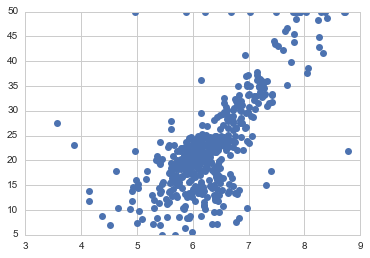

In [77]:
plt.plot(boston_df.RM,boston_df.Price,'o')

In [80]:
np.linalg.lstsq(X,Y)

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

In [81]:
m,b = np.linalg.lstsq(X,Y)[0]

In [82]:
m

9.1021089811803133

In [83]:
x= boston_df.RM

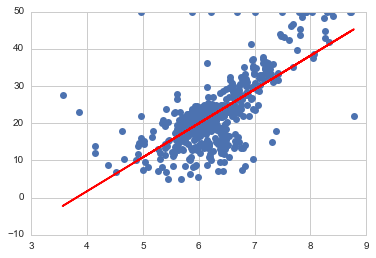

In [87]:
plt.plot(boston_df.RM,boston_df.Price,'o')
plt.plot(x,m*x+b,'r',label='Best fit Line')